In [1]:
import pandas as pd
import numpy as np

### 1)a Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Ma-lignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest asthe training set.

In [2]:
df=pd.read_csv('cancer1.csv')

In [3]:
df.shape

(569, 31)

In [4]:
df['Diag'].value_counts()

B    357
M    212
Name: Diag, dtype: int64

In [5]:
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
X=df[df.columns[df.columns!='Diag']]
X=normalize(X)

In [7]:
X=pd.DataFrame(X)

In [8]:
Y=df["Diag"]

In [9]:
df = pd.concat([X,Y],axis=1)

In [10]:
df["class"]=np.where(df["Diag"].str.contains('M'), 1, 0)

In [11]:
df=df.drop(['Diag'],axis=1)

In [12]:
df=df.sample(frac=1).reset_index(drop=True) #shuffling the data

### 1)b Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import classification_report
import random
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,f1_score,auc,roc_curve,confusion_matrix
import seaborn as sns
import statistics

## i. Supervised Learning: Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
p=[]
r=[]
sc=[]
f1=[]
AUC=[]
pp=[]
rr=[]
sc3=[]
f11=[]
AUC1=[]

for i in range(1,30):
    
    ben=df[df["class"]==0]
    mal=df[df["class"]==1]

    b1=ben.sample(frac=0.2,random_state=random.randint(0,200))
    m1=mal.sample(frac=0.2,random_state=random.randint(0,175))
    test=pd.concat([b1,m1])
    index1=test.index
    train=df.drop(index=index1)
    
    train1=train.sample(frac=1,random_state=random.randint(0,20))
    test1=test.sample(frac=1,random_state=random.randint(0,125))
    
    xtrain, ytrain=train1[train1.columns[train1.columns!='class']], train1['class']
    xtest, ytest=test1[test1.columns[test1.columns!='class']], test1['class']
    
    parameters = {'C':[0.001,0.01,1,100,1000]}
    svc=LinearSVC(penalty='l1',dual=False)
    clf=GridSearchCV(estimator=svc, param_grid=parameters,cv=5,refit=True)
    clf.fit(xtrain,ytrain)
    #print(clf.best_params_)
    clf.fit(xtrain,ytrain)
    
    actual =ytest
    predicted =clf.predict(xtest)
    p.append(precision_score(actual,predicted))
    r.append(recall_score(actual,predicted))
    sc.append(accuracy_score(actual,predicted))
    f1.append(f1_score(actual,predicted))
    
    actual1=ytrain
    predicted1=clf.predict(xtrain)
    pp.append(precision_score(actual1,predicted1))
    rr.append(recall_score(actual1,predicted1))
    sc3.append(accuracy_score(actual1,predicted1))
    f11.append(f1_score(actual1,predicted1))
    
    fpr, tpr, threshold = roc_curve(actual,predicted)
    AUC.append(auc(fpr,tpr))
    
    fpr, tpr, threshold = roc_curve(actual1,predicted1)
    AUC1.append(auc(fpr,tpr))
    
    #AUC.append(auc(actual,predicted))
    #print("Precision score= ",precision_score(actual,predicted))
    #print("Recall score= ",recall_score(actual,predicted))
    #print("accuracy= ",accuracy_score(actual,predicted))
    #print("F1 score= ",f1_score(actual,predicted))
    #print("AUC score= ",auc(ytest.reset_index(drop=True),pd.DataFrame(predicted)))

print("For Test:")    
p1=statistics.mean(p)    
print("Average Precision Score = ",p1)
r1=statistics.mean(r)
print("Average Recall Score = ",r1)
sc1=statistics.mean(sc)
print("Average Accuracy = ",sc1)
f2=statistics.mean(f1)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC)
print("Average AUC = ",a1)

print("For Train:")
p2=statistics.mean(pp)    
print("Average Precision Score = ",p2)
r2=statistics.mean(rr)
print("Average Recall Score = ",r2)
sc2=statistics.mean(sc3)
print("Average Accuracy = ",sc2)
f=statistics.mean(f1)
print("Average F1 score = ",f)
a2=statistics.mean(AUC1)
print("Average AUC = ",a2)

For Test:
Average Precision Score =  0.9510186669724374
Average Recall Score =  0.9129720853858785
Average Accuracy =  0.9499542264266098
Average F1 score =  0.9309400397883629
Average AUC =  0.9424015356506857
For Train:
Average Precision Score =  0.9604404781725701
Average Recall Score =  0.9539553752535497
Average Accuracy =  0.9681639443436176
Average F1 score =  0.9309400397883629
Average AUC =  0.9652824862764011


### For TEST

In [121]:
print("AUC for test is :")
fpr, tpr, thresholds =roc_curve(actual, predicted)
auc(fpr, tpr) #test

AUC for test is :


0.926391683433937

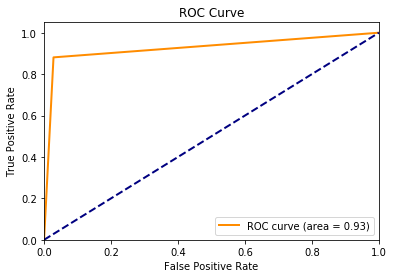

In [16]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=actual,y_score=predicted))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

CONFUSION MATRIX


Text(33,0.5,'Actual')

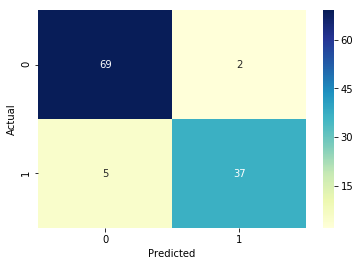

In [122]:
print("CONFUSION MATRIX")
cm=confusion_matrix(actual,predicted)
sns.heatmap(cm,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### For TRAIN

In [123]:
print("AUC for train is: ")
fpr, tpr, thresholds =roc_curve(actual1, predicted1)
auc(fpr, tpr) #train

AUC for train is: 


0.9671740024681202

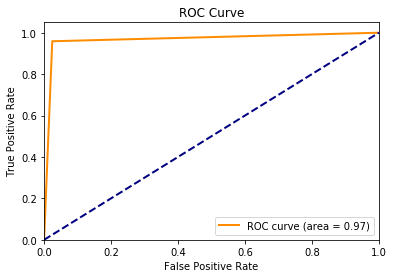

In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=actual1,y_score=predicted1))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [124]:
print("CONFUSION MATRIX")
cm1=confusion_matrix(actual1,predicted1)
print(cm1)

CONFUSION MATRIX
[[279   7]
 [  7 163]]


In [21]:
from sklearn import svm

In [22]:
#df

## ii.Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.

In [23]:
train = pd.concat([xtrain,ytrain],axis=1)
test = pd.concat([xtest,ytest],axis=1)

In [24]:
malign=train[train['class']==1]
ben=train[train['class']==0]

### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [25]:
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30): 
    mal_df=df[df['class']==0]
    ben_df=df[df['class']==1]
    df_lab=mal_df.sample(frac=0.5).append(ben_df.sample(frac=0.5)) #taking 50% of the positive and negative class
    
    index_todrop = df_lab.index
    df_unlab=df.drop(index = index_todrop)
    df_lab=df_lab.reset_index(drop=True)
    df_unlab=df_unlab.reset_index(drop=True)
    
    x_lab=df_lab.iloc[:,:-1] #train
    y_lab=df_lab.iloc[:,30]
    
    
    x_unlab=df_unlab.iloc[:,:-1] #test
    y_unlab=df_unlab.iloc[:,30]
    
    for l in range(len(x_unlab)):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=5 )
        model.fit(x_lab, y_lab)
        dist_index=np.argmax(model.decision_function(x_unlab))
        q=pd.DataFrame(x_unlab.iloc[dist_index,:]).T
        y_lab=pd.concat([y_lab,pd.DataFrame(model.predict(q))],axis=0)
        #y_lab.reset_index(drop=True)
        x_lab=pd.concat([x_lab,q],axis=0)
        x_unlab=x_unlab.drop(index=dist_index,axis=0)
        x_unlab=x_unlab.reset_index(drop=True)
        #print(len(x_lab),len(x_unlab),len(y_lab),dist_index)
        
    x_unlab=df_unlab.iloc[:,:-1]    
    pred_y_f=model.predict(x_unlab) #test
    #pred_y_tr = model.predict(x_lab)
    ps.append(precision_score(y_unlab, pred_y_f))
    rs.append(recall_score(y_unlab,pred_y_f))
    acs.append(accuracy_score(y_unlab, pred_y_f)) 
    fs.append(f1_score(y_unlab, pred_y_f))
    fpr, tpr, _ = roc_curve(y_unlab,pred_y_f)
    AUC.append(auc(fpr, tpr))
        
    x_lab=df_lab.iloc[:,:-1]
    y_lab=df_lab.iloc[:,-1]
    pred_y_f_tr=model.predict(x_lab) #train
    #pred_y_tr = model.predict(x_lab)
    ps_tr.append(precision_score(y_lab, pred_y_f_tr))
    rs_tr.append(recall_score(y_lab,pred_y_f_tr))
    acs_tr.append(accuracy_score(y_lab, pred_y_f_tr)) 
    fs_tr.append(f1_score(y_lab, pred_y_f_tr))
    fpr_tr, tpr_tr, _ = roc_curve(y_lab,pred_y_f_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))

In [26]:
print("For Test:")    
p1=statistics.mean(ps)    
print("Average Precision Score = ",p1)
r1=statistics.mean(rs)
print("Average Recall Score = ",r1)
sc1=statistics.mean(acs)
print("Average Accuracy = ",sc1)
f2=statistics.mean(fs)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC)
print("Average AUC = ",a1)

For Test:
Average Precision Score =  0.916600092814872
Average Recall Score =  0.9459119496855346
Average Accuracy =  0.9471345029239766
Average F1 score =  0.9302710613585684
Average AUC =  0.9468852113418362


In [27]:
print("For Train:")
p2=statistics.mean(ps_tr)    
print("Average Precision Score = ",p2)
r2=statistics.mean(rs_tr)
print("Average Recall Score = ",r2)
sc2=statistics.mean(acs_tr)
print("Average Accuracy = ",sc2)
f=statistics.mean(fs_tr)
print("Average F1 score = ",f)
a2=statistics.mean(AUC_tr)
print("Average AUC = ",a2)

For Train:
Average Precision Score =  0.9547429395260549
Average Recall Score =  0.9566037735849057
Average Accuracy =  0.9667840375586855
Average F1 score =  0.9556012063761481
Average AUC =  0.9647251077662355


### For TEST

In [129]:
print("AUC for test is: ")
fpr, tpr, thresholds =roc_curve(y_unlab,pred_y_f)
auc(fpr, tpr) #test

AUC for test is: 


0.9579160957099189

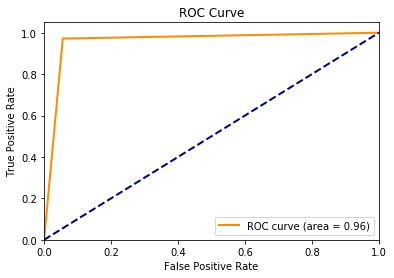

In [130]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=y_unlab,y_score=pred_y_f))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


CONFUSION MATRIX


Text(33,0.5,'Actual')

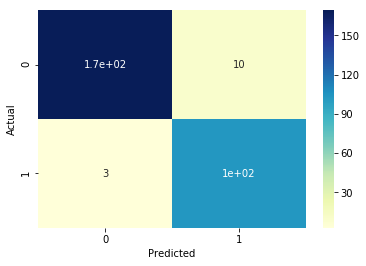

In [131]:
print("CONFUSION MATRIX")
cm3=confusion_matrix(y_unlab,pred_y_f)
sns.heatmap(cm3,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## For TRAIN

In [132]:
print("AUC for train: ")
fpr, tpr, thresholds =roc_curve(y_lab,pred_y_f_tr)
auc(fpr, tpr) #train

AUC for train: 


0.959561161755353

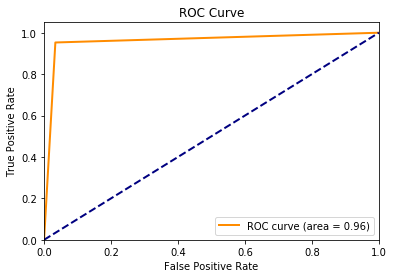

In [133]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=y_lab,y_score=pred_y_f_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [134]:
print("CONFUSION MATRIX")
cm4=confusion_matrix(y_lab,pred_y_f_tr)
print(cm4)

CONFUSION MATRIX
[[172   6]
 [  5 101]]


## iii.Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

In [136]:
df=pd.read_csv("w1.txt", header=None)

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster.

There are a couple of ways of making sure that the algorithm was not trapped in local minimum. Such as follows:

Running the k-means algorithm multiple times and initializing it with different seeds every time will make sure that the algorithm does not get trapped in local minimas as the algorithm will choose the clusters that are compact and far away from each other.
Initializing the first points can be done using kmeans++ rather than randomly
The centroid values of both the clusters will be quite different from each other, as observd above. This shows that the clusters formed are very dissimilar.
The within-ness of the clusters can be a metric that can be evaluated to test local minimas. The intertia value shown above is quite low for the algorithm to be trapped in local minima

In [137]:
df_norm=pd.DataFrame(preprocessing.normalize(df.iloc[:,2:]))
df_norm[1] = df[1].map( {'M':0, 'B':1} )
df_new=df_norm.drop(0,axis=1)
#print(df_new)

In [146]:
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30):
    train_df=pd.DataFrame()
    test_df=pd.DataFrame()
    train_x=pd.DataFrame()
    train_y=pd.DataFrame()
    pred_y_tr=pd.DataFrame()
    mal_df=df_new[df_new[1]==0]
    
    ben_df=df_new[df_new[1]==1]
    test_df=mal_df.sample(frac=0.2).append(ben_df.sample(frac=0.2))
    #print(test_df)
    index_todrop = test_df.index
    train_df=df_new.drop(index = index_todrop)
    
    train_y=train_df.loc[:,1]
    #print(test_df)
    #print(train_y)
    train_x=train_df.iloc[:,2:]
    test_y=test_df.loc[:,1]
    test_x=test_df.iloc[:,2:]
    #print(test_x,test_y)
    
    train_x=train_x.reset_index(drop=True)
    train_y=train_y.reset_index(drop=True)
    test_x=test_x.reset_index(drop=True)
    test_y=test_y.reset_index(drop=True)
    kmeans=KMeans(n_clusters=2,init='k-means++',n_init=5,random_state=random.randint(0,100)).fit(train_x)
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    distances, indices = neigh.kneighbors(kmeans.cluster_centers_)
    print(kmeans.cluster_centers_)                                                                                            
    cluster0=train_y.loc[indices[0]]
    poll=cluster0.value_counts()


    cluster1=train_y.loc[indices[1]]
    cluster1.value_counts()

    pred_y_tr = kmeans.labels_
    #print(pred_y_tr)
    #print(train_y)
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    
    pred_y = kmeans.predict(test_x)
    ps.append(precision_score(test_y, pred_y))
    rs.append(recall_score(test_y, pred_y))
    acs.append(accuracy_score(test_y, pred_y)) 
    fs.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))

[[6.28500964e-01 1.28786098e-04 1.14949187e-04 7.41211993e-05
  3.77607610e-05 2.44121617e-04 8.78319516e-05 4.05001382e-04
  1.75426125e-03 2.89028002e-03 3.07353906e-02 1.06650309e-05
  3.21721339e-05 4.13933716e-05 1.43032069e-05 2.98477746e-05
  5.32985199e-06 1.81623161e-02 3.30663265e-02 1.18484019e-01
  7.57692343e-01 1.75037987e-04 2.65090577e-04 2.56443403e-04
  1.05395169e-04 3.78283566e-04 1.12039766e-04]
 [5.46160100e-01 7.11213765e-05 9.56390315e-05 9.48060688e-05
  5.16597675e-05 1.34466631e-04 4.47352951e-05 3.78866736e-04
  8.04277901e-04 2.62676982e-03 4.03008629e-02 4.49263149e-06
  2.03133038e-05 2.47005269e-05 9.19011377e-06 1.38498429e-05
  2.64907505e-06 1.33441571e-02 2.03778497e-02 8.86337663e-02
  8.26299524e-01 1.02852585e-04 2.65367647e-04 2.95656231e-04
  1.17507949e-04 2.33352587e-04 6.62670766e-05]]
[[6.27539427e-01 1.31163321e-04 1.20842405e-04 7.85336051e-05
  3.98934947e-05 2.48030712e-04 8.93360839e-05 4.12633504e-04
  1.80011424e-03 2.92909516e-03 3.0

[[6.28357879e-01 1.30259789e-04 1.16345561e-04 7.14916537e-05
  3.82469713e-05 2.45593833e-04 8.81798737e-05 4.00008175e-04
  1.74016840e-03 2.84315594e-03 3.04284694e-02 1.08438665e-05
  3.12559319e-05 3.68186168e-05 1.38418327e-05 3.00506390e-05
  5.28767682e-06 1.81625210e-02 3.30936409e-02 1.18504381e-01
  7.57845404e-01 1.77827063e-04 2.64479266e-04 2.45441692e-04
  1.05120963e-04 3.81367617e-04 1.12419552e-04]
 [5.46078173e-01 7.00660534e-05 9.31300022e-05 9.17599515e-05
  5.10178005e-05 1.31194397e-04 4.38528432e-05 3.76466146e-04
  7.84427675e-04 2.60782452e-03 4.00819383e-02 4.41448283e-06
  1.92596476e-05 2.34693273e-05 8.93536961e-06 1.31703388e-05
  2.54655307e-06 1.32659947e-02 2.00555330e-02 8.79782913e-02
  8.26590429e-01 1.01318067e-04 2.54268180e-04 2.84016035e-04
  1.15535856e-04 2.26332837e-04 6.45035057e-05]]
[[6.28365651e-01 1.28011704e-04 1.16120503e-04 7.49125305e-05
  3.87974875e-05 2.39590988e-04 8.68220284e-05 4.03147371e-04
  1.73884013e-03 2.84654150e-03 3.0

[[5.44888019e-01 6.61863916e-05 9.06611951e-05 9.26975122e-05
  5.08145970e-05 1.25543764e-04 4.15203405e-05 3.73867260e-04
  7.51089652e-04 2.57408102e-03 4.10196419e-02 4.20811661e-06
  1.92039982e-05 2.36772389e-05 8.68329422e-06 1.23578111e-05
  2.53759877e-06 1.29304524e-02 1.91785369e-02 8.57277208e-02
  8.27594383e-01 9.53367321e-05 2.46186327e-04 2.81167799e-04
  1.11638812e-04 2.14809049e-04 6.19266699e-05]
 [6.28382960e-01 1.29686061e-04 1.16706275e-04 7.36346311e-05
  3.90025685e-05 2.45146434e-04 8.82767052e-05 4.12286708e-04
  1.80230472e-03 2.92962630e-03 3.11018542e-02 1.09090475e-05
  3.24288689e-05 3.90673883e-05 1.43708553e-05 3.02184746e-05
  5.56152003e-06 1.81368636e-02 3.29222378e-02 1.18352379e-01
  7.57797467e-01 1.76111228e-04 2.63731950e-04 2.44784149e-04
  1.05453356e-04 3.78493963e-04 1.12187131e-04]]
[[5.44773877e-01 6.81830746e-05 9.12985768e-05 9.27780911e-05
  5.15691566e-05 1.27732376e-04 4.24210916e-05 3.69419918e-04
  7.57712606e-04 2.54447948e-03 4.0

### For TRAIN

In [174]:
print("For Train:")    
p1=statistics.mean(ps_tr)    
print("Average Precision Score = ",p1)
r1=statistics.mean(rs_tr)
print("Average Recall Score = ",r1)
sc1=statistics.mean(acs_tr)
print("Average Accuracy = ",sc1)
f2=statistics.mean(fs)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC)
print("Average AUC = ",a1)

For Train:
Average Precision Score =  0.5564850101626017
Average Recall Score =  0.4245920745920746
Average Accuracy =  0.4638888888888889
Average F1 score =  0.9025663547273011
Average AUC =  0.8328303152246814


In [147]:
fpr, tpr, thresholds =roc_curve(y_lab,pred_y_f_tr)
auc(fpr, tpr) #train

0.959561161755353

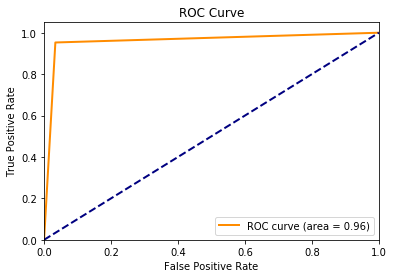

In [148]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=y_lab,y_score=pred_y_f_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix for TRAIN

In [149]:
cm5=confusion_matrix(y_lab,pred_y_f_tr)
print(cm5)

[[172   6]
 [  5 101]]


### For TEST

In [175]:
print("For Test:")    
p1=statistics.mean(ps)    
print("Average Precision Score = ",p1)
r1=statistics.mean(rs)
print("Average Recall Score = ",r1)
sc1=statistics.mean(acs)
print("Average Accuracy = ",sc1)
f2=statistics.mean(fs)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC)
print("Average AUC = ",a1)

For Test:
Average Precision Score =  0.84415461524344
Average Recall Score =  0.9704225352112676
Average Accuracy =  0.868141592920354
Average F1 score =  0.9025663547273011
Average AUC =  0.8328303152246814


In [150]:
fpr, tpr, thresholds =roc_curve(test_y,pred_y)
auc(fpr, tpr)

0.8381958417169685

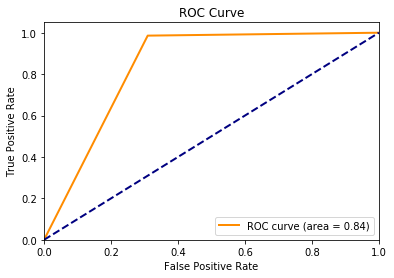

In [151]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=test_y,y_score=pred_y))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(33,0.5,'Actual')

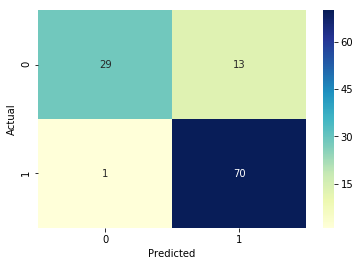

In [152]:
cm4=confusion_matrix(test_y,pred_y)
sns.heatmap(cm4,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.

In multivariate statistics and the clustering of data, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In [167]:
from sklearn.cluster import SpectralClustering
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30):
    train_df=pd.DataFrame
    test_df=pd.DataFrame
    train_x=pd.DataFrame
    train_y=pd.DataFrame
    pred_y_tr=pd.DataFrame
    mal_df=df_new[df_new[1]==0]
    ben_df=df_new[df_new[1]==1]
    test_df=mal_df.sample(frac=0.2).append(ben_df.sample(frac=0.2))
    index_todrop = test_df.index
    train_df=df_new.drop(index = index_todrop)
    train_y=train_df.loc[:,1]
    train_x=train_df.iloc[:,2:]
    test_y=test_df.loc[:,1]
    test_x=test_df.iloc[:,2:]
    
    train_x=train_x.reset_index(drop=True)
    train_y=train_y.reset_index(drop=True)
    test_x=test_x.reset_index(drop=True)
    test_y=test_y.reset_index(drop=True)
    sc=SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=random.randint(0,100)).fit(train_x)
    label=pd.DataFrame(sc.labels_)
    label_0=label[label[0]==0].index
    label_1=label[label[0]==1].index
    cluster0=train_x.iloc[label_0,:]
    cluster1=train_x.iloc[label_1,:]
    
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)
    #center0=center0.reset_index(drop=True)
    #center1=center1.reset_index(drop=True)
    #center=np.array([center0,center1])
    #center.append(center0)
    #center.append(center1)

    center=pd.DataFrame()
    center[0]=center0
    center[1]=center1
    print(center.T)
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    #print(neigh.kneighbors())
    distances, indices = neigh.kneighbors(center.T)
    cluster0=train_y.loc[indices[0]] #true values for 30 points in cluster 0      
    poll0=cluster0.value_counts()
    cluster1=train_y.loc[indices[1]] #true values for 30 points cluster 1
    poll1=cluster1.value_counts()
    #cluster1.value_counts()

    pred_y_ = kmeans.labels_
    pred_y_=pd.DataFrame(pred_y_)
    pred_y_0=pred_y_[pred_y_[0]==0]
    pred_y_1=pred_y_[pred_y_[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    pred_y_0['class']=max_index_0
    pred_y_1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y_0['class'],pred_y_1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()                                                                                           
 
    #pred_y_tr = sc.labels_
    #print(pred_y_tr)
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    
    pred_y = kmeans.predict(test_x)
    ps.append(precision_score(test_y, pred_y))
    rs.append(recall_score(test_y, pred_y))
    acs.append(accuracy_score(test_y, pred_y)) 
    fs.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))

         3         4         5         6         7         8         9   \
0  0.628746  0.000131  0.000119  0.000076  0.000039  0.000246  0.000089   
1  0.546711  0.000070  0.000093  0.000090  0.000050  0.000132  0.000044   

         10        11        12    ...           20        21        22  \
0  0.000408  0.001802  0.002902    ...     0.018168  0.032991  0.118637   
1  0.000372  0.000788  0.002572    ...     0.013205  0.019980  0.087563   

         23        24        25        26        27        28        29  
0  0.757527  0.000177  0.000268  0.000255  0.000107  0.000380  0.000113  
1  0.826044  0.000101  0.000257  0.000283  0.000114  0.000229  0.000065  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.627565  0.000129  0.000118  0.000078  0.000040  0.000243  0.000088   
1  0.540009  0.000071  0.000096  0.000095  0.000052  0.000134  0.000045   

         10        11        12    ...           20        21        22  \
0 

         3         4         5         6         7         8         9   \
0  0.546532  0.000073  0.000097  0.000094  0.000052  0.000137  0.000046   
1  0.629250  0.000128  0.000113  0.000072  0.000038  0.000240  0.000087   

         10        11        12    ...           20        21        22  \
0  0.000381  0.000816  0.002637    ...     0.013439  0.020725  0.089272   
1  0.000395  0.001725  0.002823    ...     0.018050  0.032437  0.117741   

         23        24        25        26        27        28        29  
0  0.825839  0.000106  0.000265  0.000292  0.000117  0.000236  0.000068  
1  0.757468  0.000173  0.000261  0.000249  0.000106  0.000372  0.000110  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.548554  0.000071  0.000093  0.000092  0.000051  0.000133  0.000044   
1  0.629168  0.000130  0.000120  0.000079  0.000040  0.000245  0.000088   

         10        11        12    ...           20        21        22  \
0 

         3         4         5         6         7         8         9   \
0  0.628114  0.000131  0.000118  0.000075  0.000038  0.000247  0.000089   
1  0.543589  0.000068  0.000092  0.000094  0.000052  0.000129  0.000043   

         10        11        12    ...           20        21        22  \
0  0.000410  0.001815  0.002919    ...     0.018248  0.033345  0.118996   
1  0.000357  0.000738  0.002468    ...     0.013066  0.019667  0.086796   

         23        24        25        26        27        28        29  
0  0.757895  0.000178  0.000267  0.000257  0.000106  0.000382  0.000114  
1  0.828377  0.000099  0.000257  0.000293  0.000116  0.000226  0.000064  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.628845  0.000129  0.000116  0.000074  0.000039  0.000244  0.000088   
1  0.544715  0.000073  0.000095  0.000092  0.000051  0.000135  0.000045   

         10        11        12    ...          20        21        22  \
0  

### For TRAIN

In [176]:
print("For Train:")    
p1=statistics.mean(ps_tr)    
print("Average Precision Score = ",p1)
r1=statistics.mean(rs_tr)
print("Average Recall Score = ",r1)
sc1=statistics.mean(acs_tr)
print("Average Accuracy = ",sc1)
f2=statistics.mean(fs_tr)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC_tr)
print("Average AUC = ",a1)

For Train:
Average Precision Score =  0.5564850101626017
Average Recall Score =  0.4245920745920746
Average Accuracy =  0.4638888888888889
Average F1 score =  0.45707564241766196
Average AUC =  0.4772960372960373


In [168]:
fpr, tpr, thresholds =roc_curve(train_y,pred_y_tr)
auc(fpr, tpr) #train

0.609173179761415

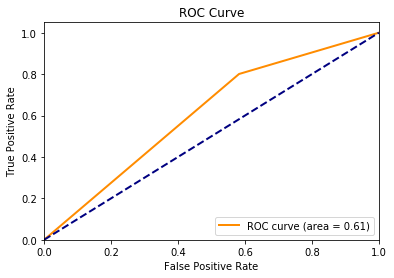

In [169]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=train_y,y_score=pred_y_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [170]:
cm6=confusion_matrix(train_y,pred_y_tr)
print(cm6)

[[ 71  99]
 [ 57 229]]


### For TEST

In [177]:
print("For Test:")    
p1=statistics.mean(ps)    
print("Average Precision Score = ",p1)
r1=statistics.mean(rs)
print("Average Recall Score = ",r1)
sc1=statistics.mean(acs)
print("Average Accuracy = ",sc1)
f2=statistics.mean(fs)
print("Average F1 score = ",f2)
a1=statistics.mean(AUC)
print("Average AUC = ",a1)

For Test:
Average Precision Score =  0.84415461524344
Average Recall Score =  0.9704225352112676
Average Accuracy =  0.868141592920354
Average F1 score =  0.9025663547273011
Average AUC =  0.8328303152246814


In [171]:
fpr, tpr, thresholds =roc_curve(test_y,pred_y)
auc(fpr, tpr)

0.8479208584842388

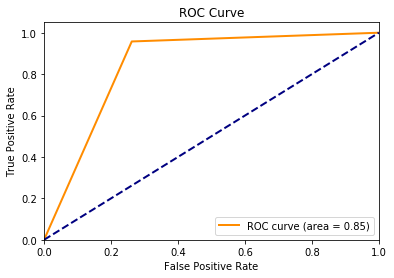

In [172]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=test_y,y_score=pred_y))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(33,0.5,'Actual')

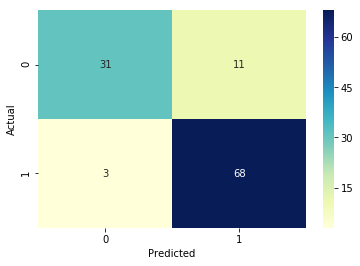

In [173]:
cm7=confusion_matrix(test_y,pred_y)
sns.heatmap(cm7,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### v.Compare the results
As we can see above, the respective test and train accuracies for supervised training is better than that of semi-supervised learning.
The metrics change as and when the algorithm is run again. <br>
Unsupervised Learning not as well as Supervised Learning. It can be seen from the errors and accuracies obtained above. <br>
Average accuracy for kmeans is 0.44 <br>
Average accuracy for spectral clustering is 0.46